## Introduction
Dataset Description:

in this project I have investigated a dataset of appoinment records for Brasil public hospitals. The data includes some attributes of patients and state if the patients showed up to appointments. The analysis is focused on finding trends influencing patients to show or not show up to appointments.

## Questions
1. Do patients who receive SMS have a higher percentage of having the consultation?
2. Which gender has the highest no-show?
3. Which age group has the lowest and highest no-show rate?
4. How many appointments have been missed in the dataset?

## Dataset Description
1. PatientId: ..Identification of a patient.
2. AppointmentID: ..Identification of each appointment.
3. Gender: ..Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. ScheduledDay: ..The day someone called or registered the appointment, this is before appointment of course.
5. AppointmentDay: ..The day of the actuall appointment, when they have to visit the doctor.
6. Age: ..How old is the patient.
7. Neighbourhood: ..Where the appointment takes place.
8. Scholarship: ..True of False . Observation, this is a broad topic.
9. Hipertension: ..True or False.
10. Diabetes: ..True or False.
11. Alcoholism: ..True or False.
12. Handcap: ..Refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2.
13. SMS_received: ..1 or more messages sent to the patient.
14. No-show: ..True or False.

# Data Wrangling

In [1]:
#import libraries to read and explore data.
import pandas as pd
import numpy as np

#import libraries to create visualization from data.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [5]:
#reading the _csv_ data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#getting the size of the dataset.
df.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset.

# Data cleaning

In [7]:
#check for duplicated entries.
df.duplicated().sum()

0

there is no duplicated entries.

In [8]:
#another  way to check if there is missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

there isn't a missing data

In [9]:
# basic info about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


the dataset is complete, and there is not an empty data.

In [10]:
# some summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


describing our data to make sure all is ready to analyze.

# Exploratory Data Analysis

count of Go show patients:

In [11]:
# getting the unique values from column "No-show".
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# get the count of no_show patients.
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

the Go show patients (88208), and the No show patients (22319).

In [13]:
# the count of the go show patients.
show= (df['No-show']=='No')
df[show].count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No-show           88208
dtype: int64

the Go show patients (88208).

In [14]:
# Visualize percentage of the go show patients.
No_show_percentage=round(df[df['No-show']=='No'].count()/df['No-show'].count()*100,2)
No_show_percentage

PatientId         79.81
AppointmentID     79.81
Gender            79.81
ScheduledDay      79.81
AppointmentDay    79.81
Age               79.81
Neighbourhood     79.81
Scholarship       79.81
Hipertension      79.81
Diabetes          79.81
Alcoholism        79.81
Handcap           79.81
SMS_received      79.81
No-show           79.81
dtype: float64

percentage of the patients on go show 79.81%

In [15]:
# the count of the No show patients.
noshow= (df['No-show']=='Yes')
df[noshow].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No-show           22319
dtype: int64

the No show patients (22319).

In [16]:
# Visualize percentage of the go show patients.
No_show_percentage=round(df[df['No-show']=='Yes'].count()/df['No-show'].count()*100,2)
No_show_percentage

PatientId         20.19
AppointmentID     20.19
Gender            20.19
ScheduledDay      20.19
AppointmentDay    20.19
Age               20.19
Neighbourhood     20.19
Scholarship       20.19
Hipertension      20.19
Diabetes          20.19
Alcoholism        20.19
Handcap           20.19
SMS_received      20.19
No-show           20.19
dtype: float64

percentage of the patients on no show 20.19%

No     88208
Yes    22319
Name: No-show, dtype: int64

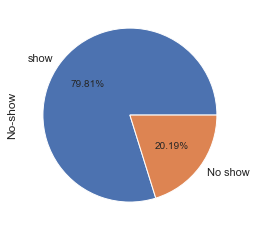

In [17]:
#drow my pie chart to explan the percentage of the 'show' and 'No show' patients.
mylabels = ["show","No show"]
df['No-show'].value_counts().plot(kind='pie',labels = mylabels,autopct = '%0.2f%%');
df['No-show'].value_counts()

the percentage of the show patients is 79.81% almost 80 %, and the No show of the patients is 20.19% .

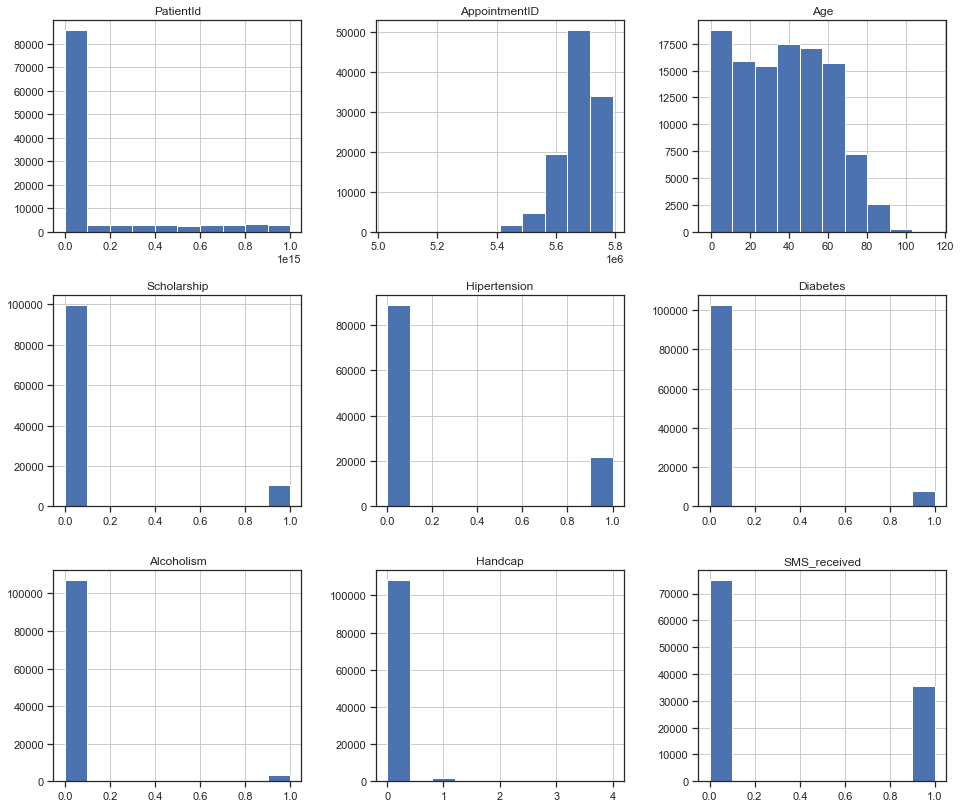

In [18]:
# histogram Visualisation.
df.hist(figsize=(16,14));

the related observations and results for the patients:
age:The sample of young adult patients is more representative than that of patients older than 60.

alcoholism: Most of the patients are not alcoholics.

diabetes: Most of the patients are not in diabetes, but thay are more than alcoholics.

handicap: there is people have handicap, but most of the patients are not handicap.

hypertension: not all the petients have hypertension diagnosed.

so my results is that: Scholarship, Hipertension, Diabetes, Alcoholism and Handcap have most of their data with a value of 0.

SMS_received: at least half of the patients did not receive SMS.

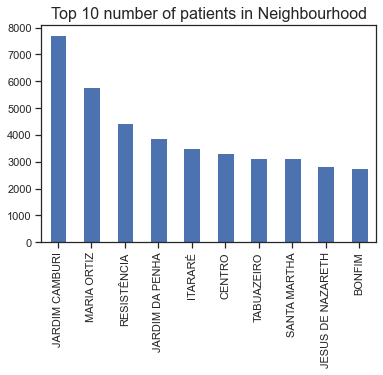

In [19]:
# Neighbourhood distribution
(df['Neighbourhood'].value_counts(normalize=False)).head(10).plot(kind='bar')
plt.title('Top 10 number of patients in Neighbourhood', fontsize=16);

## 1. Do patients who receive SMS have a higher percentage of having the consultation?

In [20]:
# separate the columns "sms_received" and "no_show".
df_SMS = df[['SMS_received', 'No-show']]
# get the head of the first 5 rows.
df_SMS.head()

,SMS_received,No-show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [21]:
# check the value counts for the sms received to the patients.
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

the patients who received sms are about 75045, and who doesn't receive any are about 35482.

In [22]:
# making the receive is 'yes' and not received is 'no'.
SMS_received = df['No-show'][(df['No-show'] == "Yes")].count()
not_received = df['No-show'][(df['No-show'] == "No")].count()
show, noshow

(0         True
 1         True
 2         True
 3         True
 4         True
           ... 
 110522    True
 110523    True
 110524    True
 110525    True
 110526    True
 Name: No-show, Length: 110527, dtype: bool,
 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 110522    False
 110523    False
 110524    False
 110525    False
 110526    False
 Name: No-show, Length: 110527, dtype: bool)

0    75045
1    35482
Name: SMS_received, dtype: int64

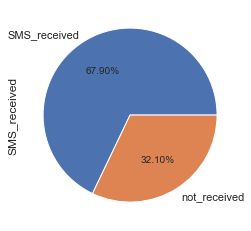

In [23]:
# Create a pie chart with proper labels. 
mylabels = ['SMS_received','not_received']
df['SMS_received'].value_counts().plot(kind='pie',labels = mylabels, autopct = '%0.2f%%');
df['SMS_received'].value_counts()

more than 67% of the patients are received sms, i made the rceceive is 'yes' and not received is 'no' to make it easy to explain.

0    75045
1    35482
Name: SMS_received, dtype: int64

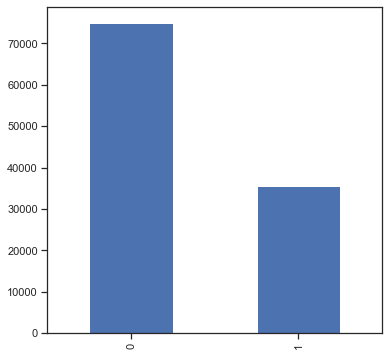

In [24]:
#  Create a bar chart to Visualise our data.
mylabels = ['SMS_received','not_received']
df['SMS_received'].value_counts().plot(kind='bar',figsize=[6,6]);
df['SMS_received'].value_counts()

most of the patiens received an sms for the appointment day.

## 2. Which gender has the highest no-show?

In [25]:
# Separate only columns "gender" and "no_show".
df_sex = df[['Gender','No-show']]
# get the first 5 head rows.
df_sex.head()

,Gender,No-show
0,F,No
1,M,No
2,F,No
3,F,No
4,F,No


In [26]:
# count the value of the patients gender.
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

the females patients are more than the males with (71840).

F    71840
M    38687
Name: Gender, dtype: int64

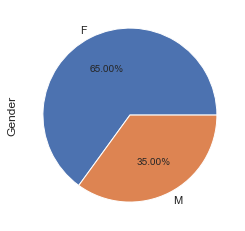

In [27]:
# Visualize percentage of the Gender.
mylabels = ['F','M']
df['Gender'].value_counts().plot(kind='pie',labels = mylabels, autopct = '%0.2f%%');
df['Gender'].value_counts()

most of the female patients get the highest appointments 65% of them, and the male patients is 35% from the appointments .

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

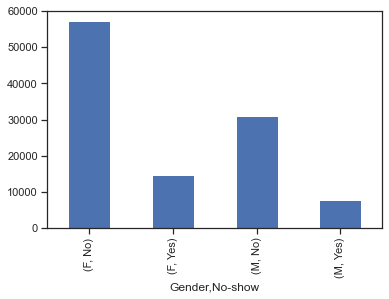

In [28]:
# Visualize percentage of the patients gender ratio.
df.groupby('Gender')['No-show'].value_counts().plot(kind='bar');
df.groupby('Gender')['No-show'].value_counts()

Out of 71831 appointments made by females, 14588 were missed, Out of 38685 appointments made by males, 7723 were missed.

## 3. Which age group has the lowest and highest no-show rate?

In [29]:
# Separate only columns "age" and "no_show".
df_Age= df[['Age','No-show']]
df_Age.head()

,Age,No-show
0,62,No
1,56,No
2,62,No
3,8,No
4,56,No


In [30]:
# deleting all rows with the negative values.
df[df.Age == -1].shape[0]

1

In [31]:
# chek the shape of the "Age" with out the negative values.
df = df[df.Age >= 0]
df.shape

(110526, 14)

In [32]:
# count the patients age (115) years old.
df2 =df[df.Age ==115]
df2

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [33]:
df.shape

(110526, 14)

In [34]:
# make a drop to both patients age that have "negative value" and over 100 years (115 y).
df = df.drop(df[df.Age <0].index)
df = df.drop(df[df.Age == 115].index)
# check the shape after we make drop.
df.shape

(110521, 14)

In [35]:
#count the 'Age' to see if has mor negative values or (155) years on our dataset.
df[df.Age == 115].count()[0] , df[df.Age == -1].count()[0]

(0, 0)

In [36]:
# count the value of the patients age.
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

In [37]:
# Age group function on dataset.
def get_num_people_by_age_category(df):
    df["Age_group"] = pd.cut(x=df['Age'], bins=[0,2,12,60,100], labels=["inf","young","middle_aged","old"])
    return df

# Call function
get_num_people_by_age_category(df).head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,old
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,middle_aged
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,old
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,young
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,middle_aged


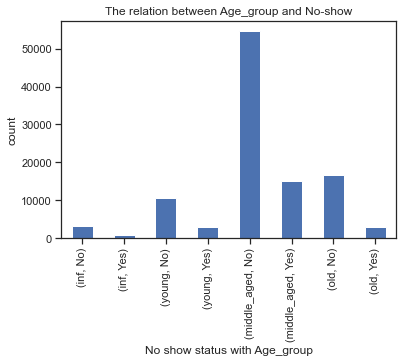

In [38]:
## Visualize percentage of the patients age.
df.groupby('Age_group')['No-show'].value_counts().plot(kind='bar',
ylabel = 'count', xlabel = 'No show status with Age_group' ,title = 'The relation between Age_group and No-show');

the histogram validation show the middle age patients are the most show up in the no-show.

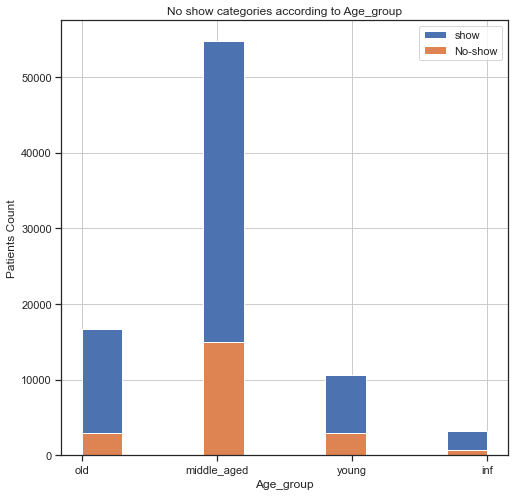

In [39]:
# adding a bivariate plot to show the relationship between variables.
plt.figure(figsize=[8,8])
df.Age_group[show].hist(label='show')
df.Age_group[noshow].hist(label='No-show')
plt.legend()
plt.title('No show categories according to Age_group')
plt.xlabel('Age_group')
plt.ylabel('Patients Count');

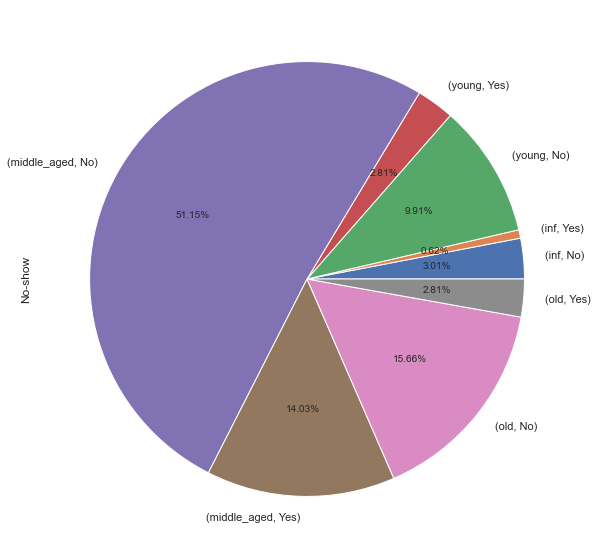

In [40]:
# Visualize percentage of the age.
df.groupby('Age_group')['No-show'].value_counts().plot(kind='pie',figsize = (10,10),autopct = '%0.2f%%');

More than half of patients are middle_age mor than 50 % from the all age patients.

## 4. No show cases according AppointmentDay.

In [41]:
# change the column from 'AppointmentDay' to 'Date'.
df['Date']= pd.to_datetime(df['AppointmentDay']).dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_group,Date
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,old,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,middle_aged,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,old,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,young,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,middle_aged,Friday


having a new column name date has the days of the week.

In [42]:
# drop columns 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_group,Date
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,old,Friday
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,middle_aged,Friday
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,old,Friday
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,young,Friday
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,middle_aged,Friday


make drop for the dataset to analyze it easy and directly.

In [43]:
# Separate only columns "Date" and "no_show".
df_Date = df[['Date', 'No-show']]
# Check dataset head.
df_Date.head()

,Date,No-show
0,Friday,No
1,Friday,No
2,Friday,No
3,Friday,No
4,Friday,No


In [44]:
# separate column 'date' only with 'no show' for the patients.
df.groupby('Date')['No-show'].value_counts()

Date       No-show
Friday     No         14981
           Yes         4037
Monday     No         18023
           Yes         4689
Saturday   No            30
           Yes            9
Thursday   No         13909
           Yes         3336
Tuesday    No         20488
           Yes         5152
Wednesday  No         20774
           Yes         5093
Name: No-show, dtype: int64

tuesday have (20488) patients and wednesday have (20774) patients , the most two days have patients.

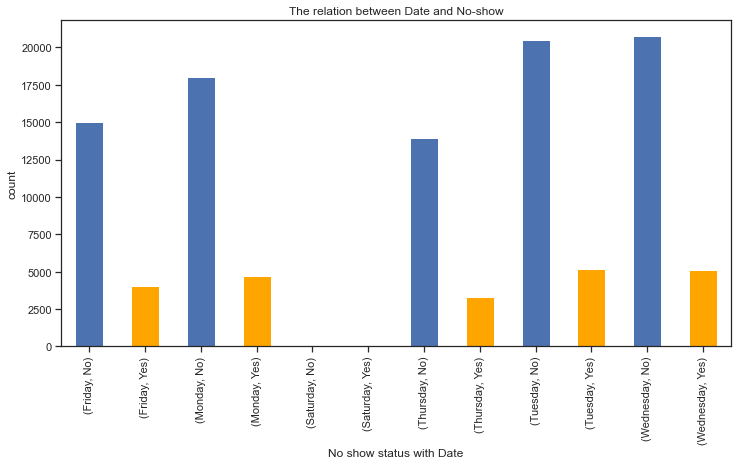

In [45]:
# Create a bar chart to Visualise our data for each day in the week.
my_colors = ['b','orange']
df.groupby('Date')['No-show'].value_counts().plot(kind='bar',color=my_colors,figsize=[12,6], 
ylabel = 'count', xlabel = 'No show status with Date' ,title = 'The relation between Date and No-show');      

the most day have patient show up in tuesday and wednesday, and we see saturday has no patients.

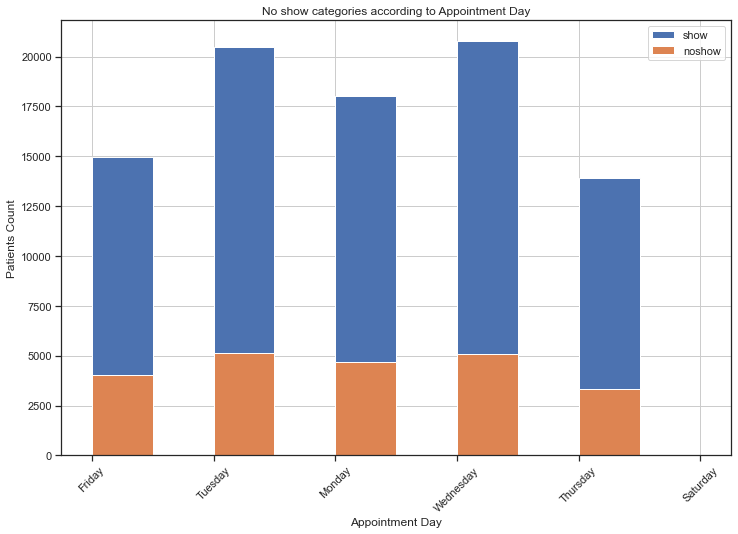

In [46]:
# adding a bivariate plot to show the relationship between variables.
plt.figure(figsize=[12,8])
df.Date[show].hist(label='show')
df.Date[noshow].hist(label='noshow')
plt.legend()
plt.title('No show categories according to Appointment Day')
plt.xlabel('Appointment Day')
locs, labels = plt.xticks(rotation=45) 
plt.ylabel('Patients Count');

## 5. No show cases according Hipertension.

In [47]:
# Separate only columns "Hipertension" and "no_show".
df_Hiper = df[['Hipertension', 'No-show']]
# Check dataset head.
df_Hiper.head()

,Hipertension,No-show
0,1,No
1,0,No
2,0,No
3,0,No
4,1,No


In [48]:
# separate column 'Hipertension' only with 'no show' for the patients.
df.groupby('Hipertension')['No-show'].value_counts()

Hipertension  No-show
0             No         70177
              Yes        18544
1             No         18028
              Yes         3772
Name: No-show, dtype: int64

In [49]:
# count the value of the patients Hipertension.
df.Hipertension.value_counts()

0    88721
1    21800
Name: Hipertension, dtype: int64

the hipertension patients (21801), the other patients donmt have hipertension (88726).

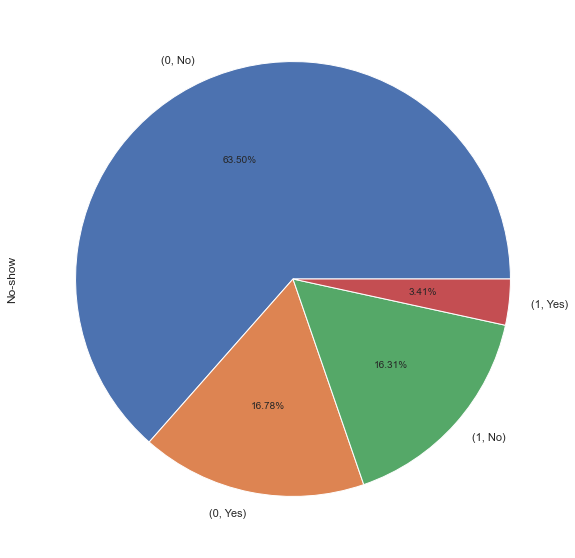

In [50]:
#Visualize percentage of the Hipertension patients.
df.groupby('Hipertension')['No-show'].value_counts().plot(kind='pie',figsize = (10,10),autopct = '%0.2f%%');

Hipertension patients almost 20% of our percentage of dataset.

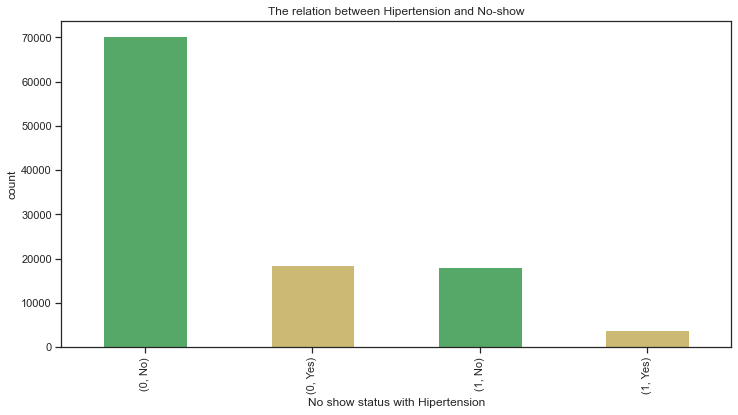

In [51]:
# Create a bar chart to Visualise our dataset.
my_colors = ['g','y']
df.groupby('Hipertension')['No-show'].value_counts().plot(kind='bar',color=my_colors,figsize=[12,6],
ylabel = 'count', xlabel = 'No show status with Hipertension' ,title = 'The relation between Hipertension and No-show');

the hipertension and no show relation on the bar chart to get more specific analyze.

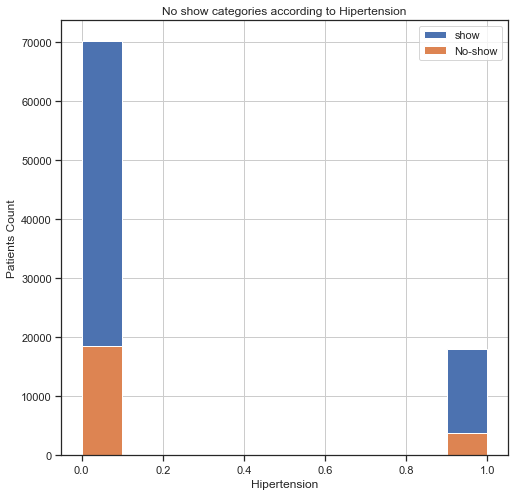

In [52]:
# adding a bivariate plot to show the relationship between variables.
plt.figure(figsize=[8,8])
df.Hipertension[show].hist(label='show')
df.Hipertension[noshow].hist(label='No-show')
plt.legend()
plt.title('No show categories according to Hipertension')
plt.xlabel('Hipertension')
plt.ylabel('Patients Count');

# Limitations

### There are a couple of limitations with our data:
1. The data do not have information about area or specialization of medical from the scheduling.
2. The handicap data does not indicate what type of disability is considered

# Conclusions

### My Results:
1. We have a higher percentage of people who received SMS and no-show compared to people who did not receive SMS.
2. We have no differences percentages of people no-show between the male or female, thay have nearly the same limit.
3. the middle age patients between (12 , 60) are the highest percentage of no-show, and the 'inf' age is the lowest percentage of no-show.
4. Most patients do not have hypertension diagnosed.
5. On average, 20% of appointments are no show (were missed).
6. The appointment Day (saterday) is emty from show and no show patients, it could be a holiday in the schedule.